In [13]:
import numpy as np    # linear algebra
import pandas as pd   # data processing
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying axes tick format 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set(style = 'white')
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

# Passed a dictionary to astype() function  
df = df.astype({"customerID":'category',
                "gender":'category',
                "SeniorCitizen":'category',
                "Partner":'category',
                "Dependents":'category',
                "tenure":'float64',
                "PhoneService":'category',
                "MultipleLines":'category',
                "InternetService":'category',
                "OnlineSecurity":'category',
                "OnlineBackup":'category',
                "DeviceProtection":'category',
                "TechSupport":'category',
                "StreamingTV":'category',
                "StreamingMovies":'category',
                "Contract":'category',
                "PaperlessBilling":'category',
                "PaymentMethod":'category',
                "MonthlyCharges": 'float64',
               })

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

**Handling Null Values**

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [40]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

## EDA

In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

there is slight class imbalance

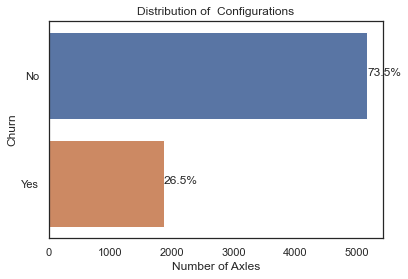

In [11]:
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution of  Configurations')
    plt.xlabel('Number of Axles')

    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(df, "Churn")

**Numerical features**

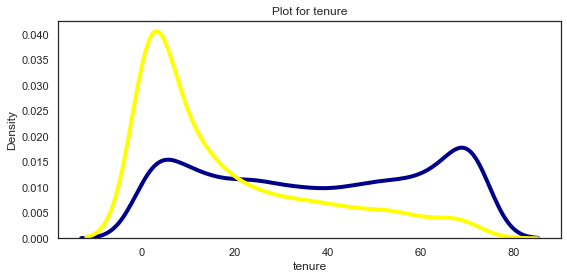

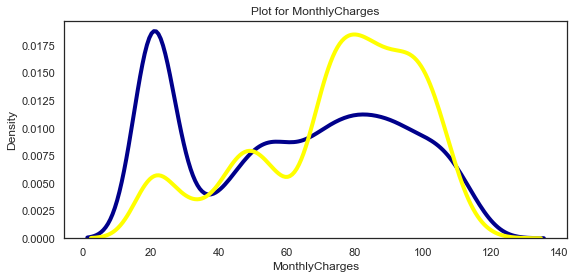

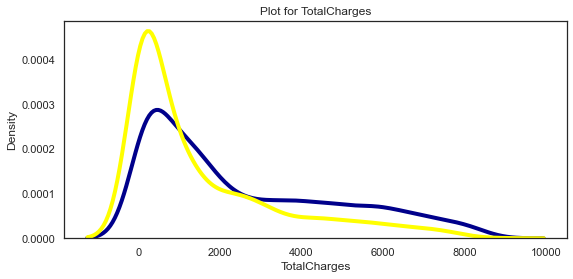

In [15]:
def kdeplot(feature, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Plot for {}".format(feature))
    ax0 = sns.distplot(df[df['Churn'] == 'No'][feature].dropna(), hist=hist, kde=kde, 
             color = 'darkblue',  label= 'Churn: No',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax1 = sns.distplot(df[df['Churn'] == 'Yes'][feature].dropna(), hist=hist, kde=kde, 
             color = 'yellow',  label= 'Churn: Yes',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
kdeplot('tenure', hist = False, kde = True)
kdeplot('MonthlyCharges', hist = False, kde = True)
kdeplot('TotalCharges', hist = False, kde = True)


From the plots above we can conclude that:

- Recent Users are more likely to churn
- Users with higher MonthlyCharges are also more likely to churn
- TotalCharges have similar property for both

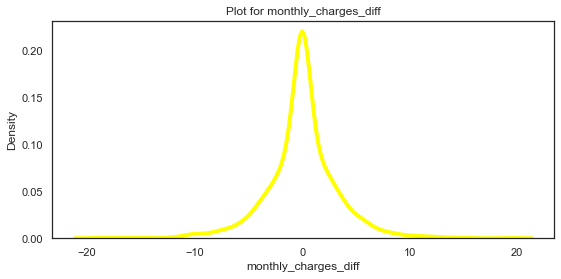

In [41]:
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff', kde = True, hist = False)

**Categorical features**

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

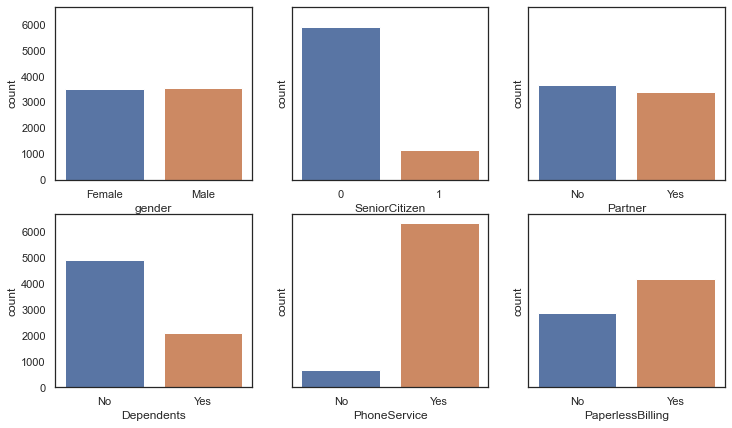

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

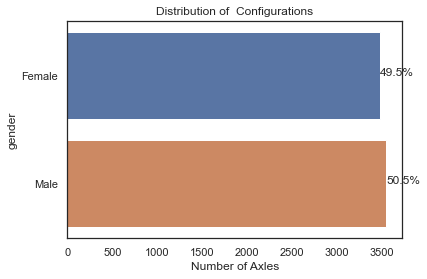

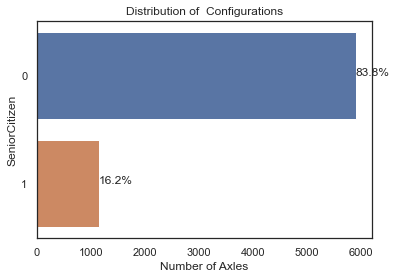

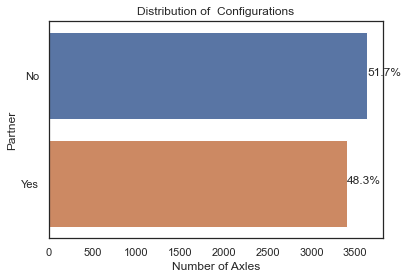

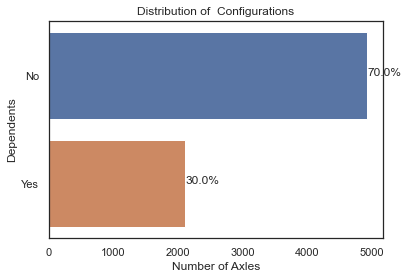

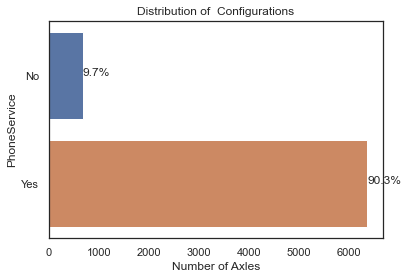

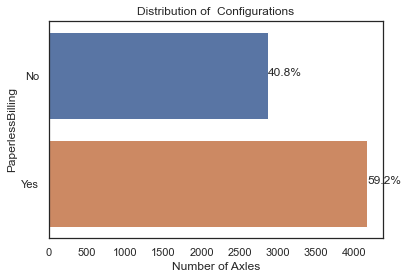

In [18]:
bar_plot(df, "gender")
bar_plot(df, "SeniorCitizen")
bar_plot(df, "Partner")
bar_plot(df, "Dependents")
bar_plot(df, "PhoneService")
bar_plot(df, "PaperlessBilling")

**Partner and Dependent:**

<AxesSubplot:xlabel='Partner', ylabel='count'>

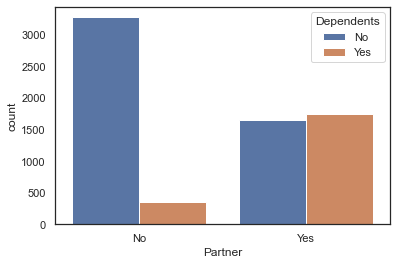

In [19]:
sns.countplot("Partner", data=df, hue = 'Dependents')

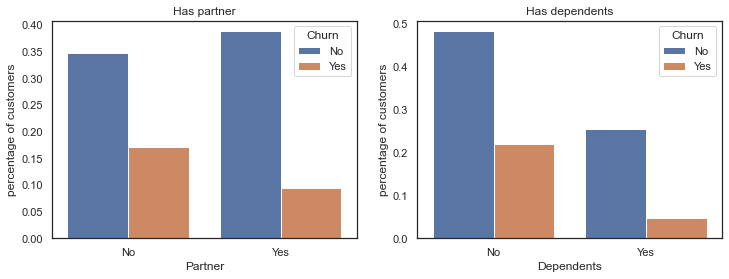

In [20]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

- Customer who has Partner is more likely to have Dependent
- Customers that don’t have Partners are more likely to churn
- Customers without Dependents are also more likely to churn

**Senior Citizens and Dependent:**

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

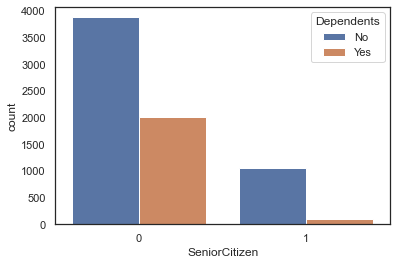

In [21]:
sns.countplot("SeniorCitizen", data=df, hue = 'Dependents')

- Senior Citizen is less likely to have Dependent

**Phone and Internet services**

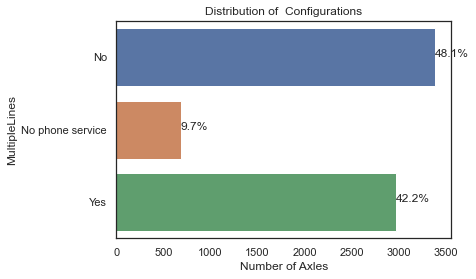

In [22]:
bar_plot(df, "MultipleLines")

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

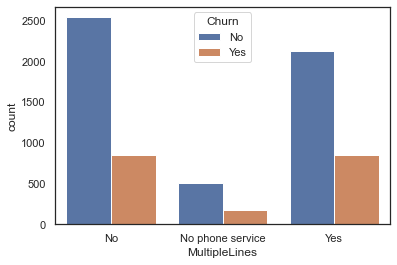

In [23]:
sns.countplot("MultipleLines", data=df, hue = 'Churn')

- Few customers don’t have phone service
- Customers with multiple lines have a slightly higher churn rate

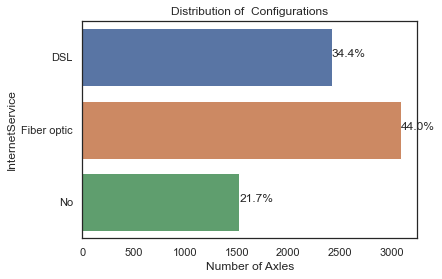

In [24]:
bar_plot(df, "InternetService")

<AxesSubplot:xlabel='InternetService', ylabel='count'>

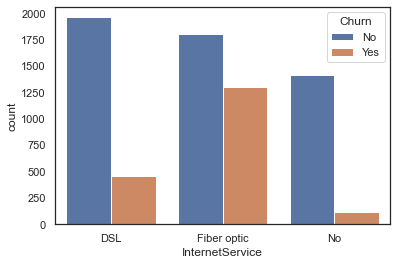

In [25]:
sns.countplot("InternetService", data=df, hue = 'Churn')

- Customers without internet have a very low churn rate
- Customers with fiber are more probable to churn than those with a DSL connection

**OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies**

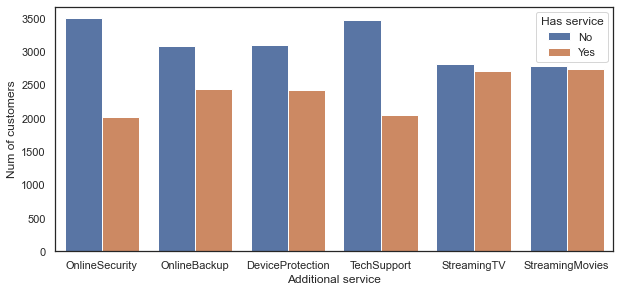

In [26]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

- Customers with the first 4 additionals (security to tech support) are more unlikely to churn
- Streaming service is not predictive for churn

**Payment Method**

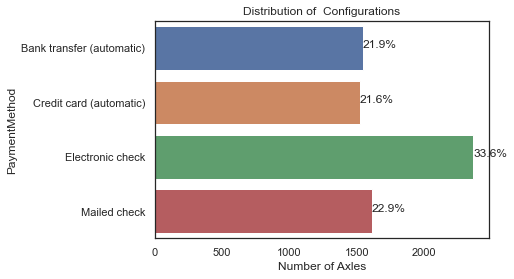

In [27]:
bar_plot(df, "PaymentMethod")

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

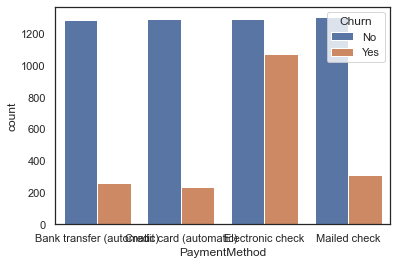

In [28]:
sns.countplot("PaymentMethod", data=df, hue = 'Churn')

- Electronic Check is the Largest Payment method
- Electronic Check has most churn in Payment Method

**Feature Importance**

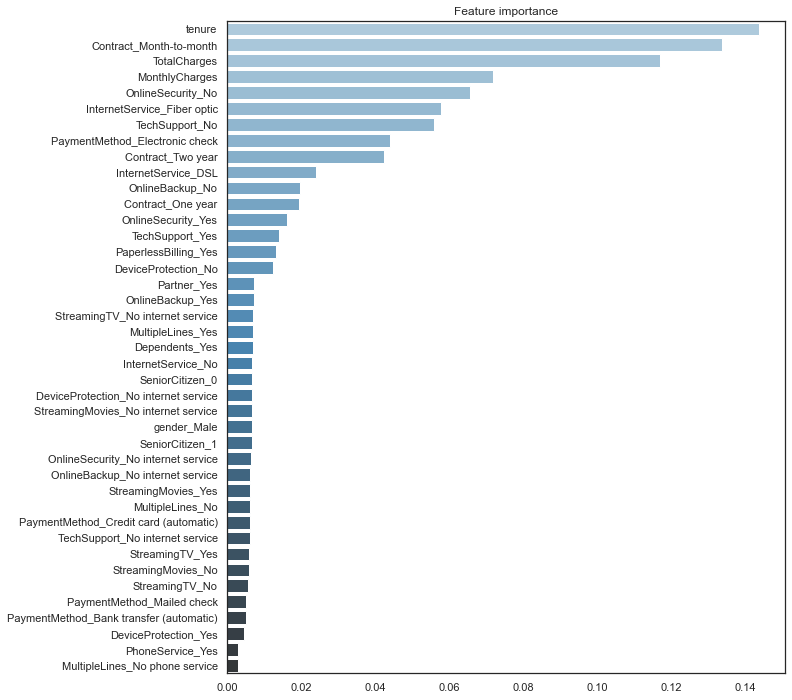

In [43]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
df = pd.get_dummies(df)
# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop,axis=1), df['Churn_Yes']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

**Oversampling Technique**

In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(x, y)

In [45]:
y_resampled.value_counts()

1    5174
0    5174
Name: Churn_Yes, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)

## Model

In [47]:
clf_forest = GradientBoostingClassifier()
clf_forest.fit(X_train, y_train)

GradientBoostingClassifier()

In [48]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8639768059917855

In [51]:
y_pred = clf_forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.8560386473429952

In [53]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[865, 156],
       [142, 907]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)                  # Accuracy

0.8560386473429952

In [55]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)      # Recall

array([0.84720862, 0.86463298])

In [56]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)   # Precision

array([0.85898709, 0.85324553])